<a href="https://colab.research.google.com/github/jmeugniot/bsan6070/blob/main/CA04/CA04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your name: Jamie Meugniot
## Assignment Name: CA04 - Ensemble Algorithm

# Program Inititialization Section
## Import packages

In [1]:
# import packages 
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as pltpy
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder #Import label encoder to transform categorical variables into numerical
from sklearn.ensemble import RandomForestClassifier

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#read datasets
census_df = pd.read_csv("/content/drive/My Drive/MSBA_Colab_2020/ML_Algorithms/CA04/Data/census_data.csv")
census_df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


# Exploratory Data Investigation



In [ ]:
#Descriptive Statistics
census_df.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
#Total Rows & Columns
census_df.shape

(48842, 11)

In [ ]:
#Count of non-null values
census_df.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [ ]:
#Count of null values
census_df.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [ ]:
#Dataframe Info
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [ ]:
#Top & Bottom Records
census_df.head()
census_df.tail()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0
48841,e. 51-60,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,c. 31-35 & 61-70,test,1


#Label Encoding & Data Splitting

###Label Encoding of Feature Columns

In [ ]:
census_df.columns

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object')

In [ ]:
#Change feature columns into a categorical variable so we can use the label encoder in the next cell
for col in ['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']:
    census_df[col] = census_df[col].astype('category')

census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   hours_per_week_bin  48842 non-null  category
 1   occupation_bin      48842 non-null  category
 2   msr_bin             48842 non-null  category
 3   capital_gl_bin      48842 non-null  category
 4   race_sex_bin        48842 non-null  category
 5   education_num_bin   48842 non-null  category
 6   education_bin       48842 non-null  category
 7   workclass_bin       48842 non-null  category
 8   age_bin             48842 non-null  category
 9   flag                48842 non-null  object  
 10  y                   48842 non-null  int64   
dtypes: category(9), int64(1), object(1)
memory usage: 1.2+ MB


In [ ]:
#use the label encoder to code each bin as a numeric number as shown by running the dataframe at the end to show the results
census_df[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']] = census_df[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']].apply(LabelEncoder().fit_transform)
census_df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,1,1,1,2,2,2,2,1,3,train,0
1,0,4,2,0,2,2,2,1,4,train,0
2,1,0,1,0,2,1,1,1,3,train,0
3,1,0,2,0,1,0,0,1,4,train,0
4,1,4,2,0,0,2,2,1,1,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,1,4,1,0,1,2,2,1,3,test,0
48838,1,1,0,0,1,1,1,0,2,test,0
48839,3,4,2,0,2,2,2,1,3,test,0
48840,1,1,0,2,2,2,2,1,4,test,0


###Create Training Data & Testing Data

In [ ]:
##Create Train & Test Dataframes

#Split original csv file into training and testing data based on the flag column
train_df = census_df.loc[census_df.flag == 'train']
test_df = census_df.loc[census_df.flag == 'test']

#Observe the training data and testing data
train_df.head()
test_df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32561,1,1,0,0,1,0,0,1,0,test,0
32562,3,1,2,0,2,1,1,1,3,test,0
32563,1,3,2,0,2,1,1,1,1,test,1
32564,1,1,2,2,1,1,1,1,4,test,1
32565,0,1,0,0,1,1,1,0,0,test,0


In [ ]:
#Remove flag column from test and train dataframes now that they have been separated
train_df.drop(columns='flag', inplace=True)
test_df.drop(columns='flag', inplace=True)

#Observe the training data and testing data
train_df.head()
test_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,y
32561,1,1,0,0,1,0,0,1,0,0
32562,3,1,2,0,2,1,1,1,3,0
32563,1,3,2,0,2,1,1,1,1,1
32564,1,1,2,2,1,1,1,1,4,1
32565,0,1,0,0,1,1,1,0,0,0


###Split data into feature columns and labels

In [ ]:
#Split training data into attributes and labels
y_train = train_df['y']
x_train = train_df.drop('y', axis=1)

In [ ]:
#Split testing data into attributes and labels
y_test = test_df['y']
x_test = test_df.drop('y', axis=1)

x_test

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
32561,1,1,0,0,1,0,0,1,0
32562,3,1,2,0,2,1,1,1,3
32563,1,3,2,0,2,1,1,1,1
32564,1,1,2,2,1,1,1,1,4
32565,0,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...
48837,1,4,1,0,1,2,2,1,3
48838,1,1,0,0,1,1,1,0,2
48839,3,4,2,0,2,2,2,1,3
48840,1,1,0,2,2,2,2,1,4


#3. Building a Random Forest Model

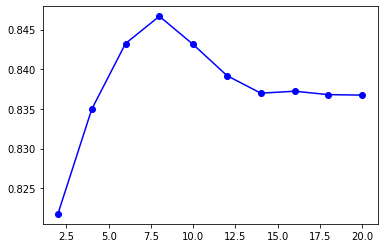

In [ ]:
##Find the optimal value for maximum depth

results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]

for trees in max_depth_options:
  model = DecisionTreeClassifier(max_depth=trees, random_state=101)
  model.fit(x_train, y_train)
  y_pred = model.predict (x_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)

pltpy.plot(figsize=(8,4))
pd.Series(results, max_depth_options).plot (color='blue', marker='o')

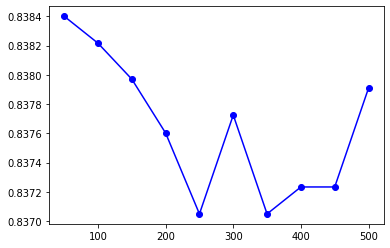

In [ ]:
##Find the optimal value for n_estimators

est_results = []
n_est = [50,100,150,200,250,300,350,400,450,500]

for trees in n_est:
  rfc = RandomForestClassifier(n_estimators=trees, random_state=101)
  rfc.fit(x_train, y_train)
  y_pred = rfc.predict (x_test)
  accuracy = np.mean(y_test == y_pred)
  est_results.append(accuracy)

pltpy.plot(figsize=(8,4))
pd.Series(est_results, n_est).plot (color='blue', marker='o')

####Questions Answered:
1. Given the results above, we see that the lowest estimator of 50 gave the best accuracy score. As the number of trees increased the accuracy decreased until a spike at 300 trees and another spike at 500. 
2. The optimal value of the estimator within the given range is 50 trees based on the graph above.

#4. Boost Models

###AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

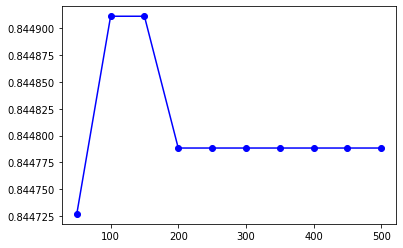

In [ ]:
abc_results = []
abc_estimators = [50,100,150,200,250,300,350,400,450,500]
for trees in abc_estimators:
  abc_model = AdaBoostClassifier(n_estimators=trees, random_state=101)
  abc_model.fit(x_train, y_train)
  y_pred = abc_model.predict (x_test)
  accuracy = np.mean(y_test == y_pred)
  abc_results.append(accuracy)

plt.plot(figsize=(8,4))
pd.Series(abc_results, abc_estimators).plot (color='blue', marker='o')

###Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

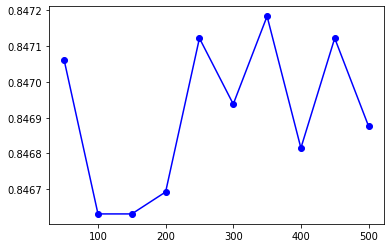

In [ ]:
gbc_results = []
gbc_estimators = [50,100,150,200,250,300,350,400,450,500]
for trees in gbc_estimators:
  gbc_model = GradientBoostingClassifier(n_estimators=trees, random_state=101)
  gbc_model.fit(x_train, y_train)
  y_pred = gbc_model.predict (x_test)
  accuracy = np.mean(y_test == y_pred)
  gbc_results.append(accuracy)

plt.plot(figsize=(8,4))
pd.Series(gbc_results, gbc_estimators).plot (color='blue', marker='o')

###XGB Classifier

In [ ]:
from xgboost import XGBClassifier

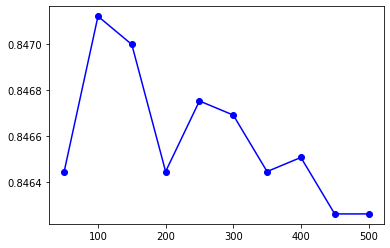

In [ ]:
xgb_results = []
xgb_estimators = [50,100,150,200,250,300,350,400,450,500]
for trees in xgb_estimators:
  xgb_model = XGBClassifier(n_estimators=trees, random_state=101)
  xgb_model.fit(x_train, y_train)
  y_pred = xgb_model.predict (x_test)
  accuracy = np.mean(y_test == y_pred)
  xgb_results.append(accuracy)

plt.plot(figsize=(8,4))
pd.Series(xgb_results, xgb_estimators).plot (color='blue', marker='o')

#5. Model Performance Comparison

In [ ]:
results = []
classifiers = [RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier]

params = {'n_estimators':100,'random_state':101}

for option in classifiers:

  model = option(**params)
  model.fit(x_train, y_train)
  y_pred = model.predict (x_test)
  accuracy = np.mean(y_test == y_pred)
  AUC = metrics.roc_auc_score(y_test,y_pred)

  results.append([accuracy, AUC])

comparison = pd.DataFrame(results).transpose()
comparison.columns = ['RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier']
comparison.index = ['Accuracy','AUC']
comparison



,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier
Accuracy,0.838216,0.844911,0.846631,0.847122
AUC,0.747542,0.746088,0.756732,0.756785


In [ ]:
print(params)

{'n_estimators': 100, 'random_state': 101}
